In [ ]:
# Goal is to predict when a flight would be delayed based on 2019-2020 data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly import *
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict # Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, precision_score,recall_score
from yellowbrick.classifier import ROCAUC



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
# The URL is from Fatmir's Project 2 Github, 
# Pratik suggested to get the url so it can load fast, it only took a few seconds to load now! - Celine
path19 = 'https://raw.githubusercontent.com/flikrama/UH-SPE-ML-Bootcamp-Team4-Project2/master/Jan_2019_ontime.csv'
df19 = pd.read_csv(path19)

In [ ]:
df19 = df19.drop('Unnamed: 21', axis = 1)

In [ ]:
print(df19.shape)
print(df19.describe())
print(df19.dtypes)

(583985, 21)
        DAY_OF_MONTH    DAY_OF_WEEK  ...       DIVERTED       DISTANCE
count  583985.000000  583985.000000  ...  583985.000000  583985.000000
mean       15.960088       3.835626  ...       0.002219     797.742767
std         8.987942       1.921899  ...       0.047056     589.999261
min         1.000000       1.000000  ...       0.000000      31.000000
25%         8.000000       2.000000  ...       0.000000     363.000000
50%        16.000000       4.000000  ...       0.000000     640.000000
75%        24.000000       5.000000  ...       0.000000    1037.000000
max        31.000000       7.000000  ...       1.000000    4983.000000

[8 rows x 15 columns]
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    ob

In [ ]:
# Number of NaN values in df for each column
df19.isna().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [ ]:
# dropped NaN values in df
df19 = df19.dropna()
print(df19.shape)

(565963, 21)


In [ ]:
# verifying if NaN values were dropped
df19.isna().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [ ]:
# Number of Unique elements in df
df19.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5441
OP_CARRIER_FL_NUM        6833
ORIGIN_AIRPORT_ID         346
ORIGIN_AIRPORT_SEQ_ID     346
ORIGIN                    346
DEST_AIRPORT_ID           346
DEST_AIRPORT_SEQ_ID       346
DEST                      346
DEP_TIME                 1438
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1451
dtype: int64

In [ ]:
df19.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [ ]:
#Remove columns which won't be used
df_red = df19.drop([ 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME',
       'CANCELLED','ARR_TIME',
       'DIVERTED'], axis = 1)

In [ ]:
df_red.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
0,1,2,9E,GNV,ATL,0.0,0600-0659,0.0,300.0
1,1,2,9E,MSP,CVG,0.0,1400-1459,0.0,596.0
2,1,2,9E,DTW,CVG,0.0,1200-1259,0.0,229.0
3,1,2,9E,TLH,ATL,0.0,1500-1559,0.0,223.0
4,1,2,9E,ATL,FSM,0.0,1900-1959,0.0,579.0


Since `DAY_OF_WEEK`,`DAY_OF_MONTH`,`DEP_DEL15`,`ARR_DEL15`,`CANCELLED`,`DIVERTED` are categorical variables, transforming them to category object is necessary.  

In [ ]:
df_red1 = df_red
cat_col = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15']
for col in cat_col:
  df_red1[col] = df_red1[col].astype('category') 

###Discretizing the `DISTANCE`

Using pd.qcut function we would discretize the `DISTANCE` feature into equal sized 4 quantiles. This would help in decreasing the search space and would decrease the computational time for training algorithms. 

In [ ]:
df_red1['DISTANCE_cat'] = pd.qcut(df_red1['DISTANCE'], q=4)

In [ ]:
#Checking the dataframe after preprocessing (Sanity check to check if the variables are categorized or not.)
pd.DataFrame({'missing': df_red.isna().mean()*100,
              'type':df_red.dtypes})

,missing,type
DAY_OF_MONTH,0.0,category
DAY_OF_WEEK,0.0,category
OP_UNIQUE_CARRIER,0.0,object
ORIGIN,0.0,object
DEST,0.0,object
DEP_DEL15,0.0,category
DEP_TIME_BLK,0.0,object
ARR_DEL15,0.0,category
DISTANCE,0.0,float64
DISTANCE_cat,0.0,category


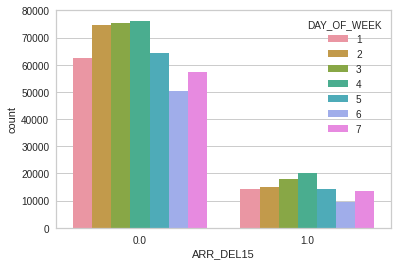

In [ ]:
#all delayed flights by weekday
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DAY_OF_WEEK'])

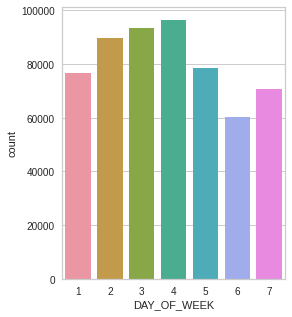

In [ ]:
#all flights per day
f, ax = plt.subplots()
sb.countplot(x = df_red['DAY_OF_WEEK'])
f.set_size_inches(4,5)

In [ ]:
df_red.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_DEL15', 'DISTANCE', 'DISTANCE_cat'],
      dtype='object')

Seems like we need to normalize the delayed flights per day to the total number of flights per day

Text(0, 0.5, 'Fraction of delayed flights')

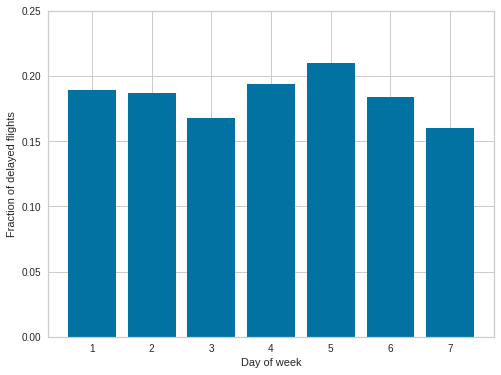

In [ ]:
# create new dataframe for plotting categorical values without interfering with our algorithms
delayed_norm = pd.DataFrame()
delayed_norm['DAY_OF_WEEK'] = df_red['DAY_OF_WEEK'].astype(int)
delayed_norm['ARR_DEL15'] = df_red['ARR_DEL15'].astype(int)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6))
plt.bar(x = delayed_norm['DAY_OF_WEEK'].unique(), height = delayed_norm.groupby(['DAY_OF_WEEK'])['ARR_DEL15'].mean())
plt.ylim([0, 0.25])
plt.xlabel('Day of week')
plt.ylabel('Fraction of delayed flights')

As can be seen the fraction of dleayed flights per day looks different from the total delayed flights. Highest proportion is day 5 as opposed to day 4 in raw total numbers

Text(0, 0.5, 'Fraction of delayed flights')

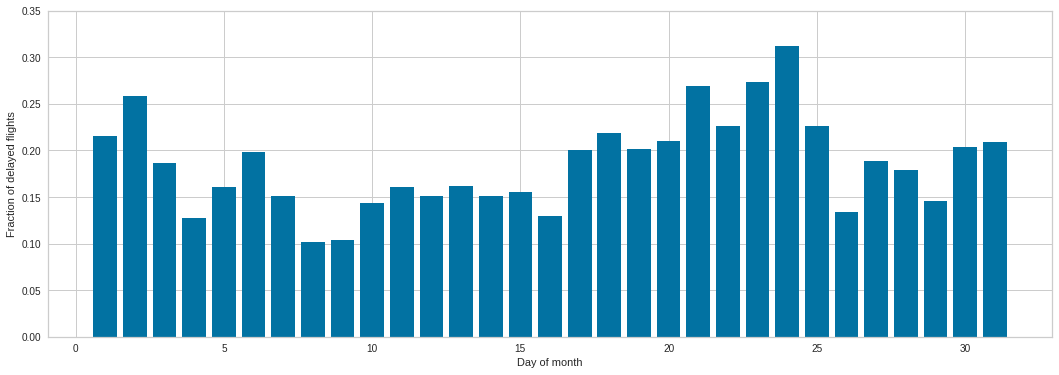

In [ ]:
delayed_norm['DAY_OF_MONTH'] = df_red['DAY_OF_MONTH'].astype(int)

figure(num=None, figsize=(18, 6))
plt.bar(x = delayed_norm['DAY_OF_MONTH'].unique(), height = delayed_norm.groupby(['DAY_OF_MONTH']).mean()['ARR_DEL15'])
plt.ylim([0, 0.35])
plt.xlabel('Day of month')
plt.ylabel('Fraction of delayed flights')

Text(0, 0.5, 'Fraction of delayed flights')

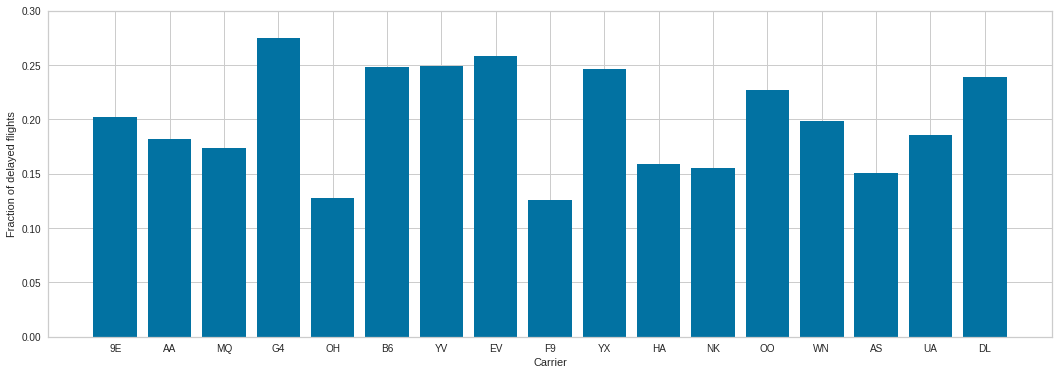

In [ ]:
delayed_norm['OP_UNIQUE_CARRIER'] = df_red['OP_UNIQUE_CARRIER'].astype(str)

figure(num=None, figsize=(18, 6))
plt.bar(x = delayed_norm['OP_UNIQUE_CARRIER'].unique(), height = delayed_norm.groupby(['OP_UNIQUE_CARRIER']).mean()['ARR_DEL15'])
plt.ylim([0, 0.3])
plt.xlabel('Carrier')
plt.ylabel('Fraction of delayed flights')

Text(0, 0.5, 'Fraction of delayed flights')

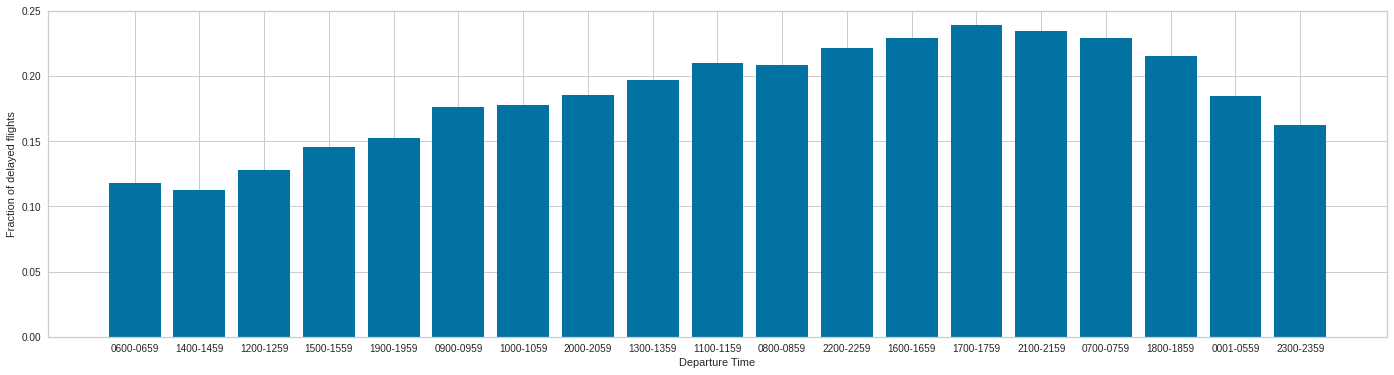

In [ ]:
delayed_norm['DEP_TIME_BLK'] = df_red['DEP_TIME_BLK'].astype(str)

figure(num=None, figsize=(24, 6))
plt.bar(x = delayed_norm['DEP_TIME_BLK'].unique(), height = delayed_norm.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'])
plt.ylim([0., 0.25])
plt.xlabel('Departure Time')
plt.ylabel('Fraction of delayed flights')

In [ ]:
delayed_norm.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'].sort_values()

DEP_TIME_BLK
0600-0659    0.112813
0001-0559    0.118162
0700-0759    0.127854
0800-0859    0.145400
0900-0959    0.152186
2300-2359    0.162692
1000-1059    0.176263
1100-1159    0.177826
2200-2259    0.184900
1200-1259    0.185168
1300-1359    0.196801
1500-1559    0.208362
1400-1459    0.209567
2100-2159    0.214907
1600-1659    0.221165
2000-2059    0.228903
1700-1759    0.229099
1900-1959    0.234680
1800-1859    0.239034
Name: ARR_DEL15, dtype: float64

In [ ]:
delayed_norm['DEST'] = df_red['DEST']

#Lowest and Highest ratio of delayed flights by Destination
delayed_norm.groupby(['DEST']).mean()['ARR_DEL15'].sort_values()

DEST
ELM    0.000000
CPR    0.044118
LWS    0.047619
DRT    0.050847
BTM    0.051724
         ...   
HGR    0.400000
MKG    0.425532
MMH    0.440000
OGS    0.500000
OGD    0.500000
Name: ARR_DEL15, Length: 346, dtype: float64

In [ ]:
delayed_norm['ORIGIN'] = df_red['ORIGIN']

#Lowest and Highest ratio of delfayed flights by Origin
delayed_norm.groupby(['ORIGIN']).mean()['ARR_DEL15'].sort_values()

ORIGIN
LYH    0.000000
PPG    0.000000
CPR    0.014706
LWS    0.031250
BRW    0.033333
         ...   
ACV    0.429825
VEL    0.434783
OWB    0.444444
OGD    0.500000
OGS    0.600000
Name: ARR_DEL15, Length: 346, dtype: float64

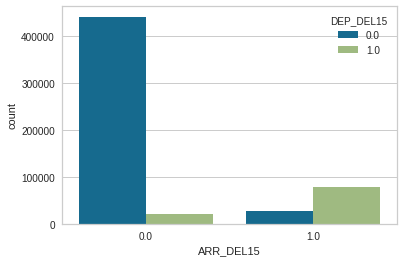

In [ ]:
#Check by delay in departure
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DEP_DEL15'])

As expected, flights that leave late also arrive late

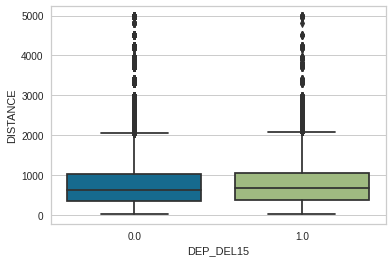

In [ ]:
sb.boxplot('DEP_DEL15', 'DISTANCE', data=df_red, orient='v')

In [ ]:
df_red.groupby(['DEP_DEL15']).mean()['DISTANCE']

DEP_DEL15
0.0    799.301073
1.0    817.114257
Name: DISTANCE, dtype: float64

In [ ]:
df_red.groupby(['DEP_DEL15']).median()['DISTANCE']

DEP_DEL15
0.0    637.0
1.0    674.0
Name: DISTANCE, dtype: float64

There seems to be a slightly higher distance traveled for flights that were delayed. Let us do a t-test to check whether this difference is statistically significant

In [ ]:
stats.ttest_ind(df_red[df_red['ARR_DEL15'] == 1]['DISTANCE'], df_red[df_red['ARR_DEL15'] == 0]['DISTANCE'], equal_var=False)

Ttest_indResult(statistic=2.5804047623776594, pvalue=0.009869350308986821)

It is significant!

In [ ]:
delayed_norm['DEP_DEL15'] = df_red['DEP_DEL15'].astype(int)

values = [delayed_norm['DEP_DEL15'].value_counts()[0], delayed_norm['DEP_DEL15'].value_counts()[1]]
labels = ["Not Delayed", "Delayed by (>15 minutes)"]
colors = ['bisque','red']
values_arr = [delayed_norm['ARR_DEL15'].value_counts()[0],delayed_norm['ARR_DEL15'].value_counts()[1]]
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Total Departures', 'Total Arrivals'])
fig.add_trace(go.Pie(labels=labels, values=values, pull=[0, 0.1],textinfo = 'label+percent'),1,1)
fig.add_trace(go.Pie(labels=labels, values=values_arr, pull=[0, 0.1],textinfo = 'label+percent'),1,2)
fig.update_traces( textinfo='value', textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#fig.update_layout(uniformtext.minsize=4, uniformtext.mode='hide', title_text='Flights Delayed', title_x = 0.5, legend_title='Flights',legend=dict(x=.45, y=0.6))
fig.update_layout(dict1 = dict(title_text='Flights Delayed', title_x = 0.5, legend=dict(x=.45, y=0.6)))
fig.show()

In [ ]:
dep_time = pd.DataFrame(df_red['DEP_TIME_BLK'].value_counts().reset_index().values, columns=["DEP_TIME_BLK", "AggregateDepTime"])
dep_time = dep_time.sort_values('DEP_TIME_BLK',ascending=True)
width = [0.5] *20
fig = go.Figure(data=[go.Bar(x = dep_time['DEP_TIME_BLK'], y = dep_time['AggregateDepTime'], width = width, 
                             marker_color =px.colors.sequential.turbid, opacity =0.8, marker_line_width=2, text = dep_time['AggregateDepTime'],textposition='outside' )])
fig.update_xaxes(tickangle= 45)
fig.add_annotation( x='0600-0659', y=40000, text="<b>Highest Departures<b>",showarrow=False, font=dict( family="Calbiri", size=12, color = "#ffffff"), 
                   align="left", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="#636363", ax=50, ay=-40, bordercolor="#302f2f", borderwidth=2.5, borderpad=6, bgcolor="#f29624", opacity=0.8)
fig.show()

Inferences 


*   From the above two graphs it can be seen that 1,4,11,18,25 have least cancelled and rerouted flights. They have 7 days of gap in between. 
*   Similarly, dates 2,3,10,17,24 have most cancelled flights and rerouted flights. They also have 7 days of gap in them. 



---



In [ ]:
import calendar
yy = 2020 
mm = 1    
print(calendar.month(yy, mm))

    January 2020
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30 31



Inferences

From the above calendar for 2020 we can confirm that there is seasonality in the cancellations and rerouting flights.
*   Saturday's in the month have least cancelled and rerouted flights.
*   Friday's and Thursday in the month have highest no. of cancellations and rerouted flights. 

---





In [ ]:
delayed_norm['OP_CARRIER'] = df19['OP_CARRIER']

plot6 = delayed_norm.groupby('OP_CARRIER')['DEP_DEL15'].sum().sort_values()
fig6 = px.pie(names=plot6.index,values=list(map(int,plot6.values)),
              color_discrete_sequence =px.colors.qualitative.T10, hole=0.5, title='Airlines with most delayed flights')
fig6.show()


#**From Abstract***
We will be implementing random forest classifier, decision tree. As far as decision tree are concerned gradient boosting algorithms will be used as an ensemble method. If we find any weak classifiers in the dataset, we would try to combine those weak classifiers into one and using Ada Boost classifier. Lastly, neural network by using keras will be used to learn about delays. So, random forest classifier, decision tree, gradient boosting, Ada Boost classifier, neural network by keras. 

#Problem:
The problem we will tackle is predicting the number of flight delays using one year of past flight data

#so it's       
               Day of the Week v.s delayed flight 
              Day of the Month v.s delayed flight 
         OP Carrier Airline ID v.s delayed flight
                 Dep Time Bulk v.s delayed flight



Adding dummy variables for categorical variables: OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST','DEP_TIME_BLK'

In [ ]:
df_dum = pd.get_dummies(df_red, columns = [ 'ORIGIN', 'DEST', 'OP_UNIQUE_CARRIER', 'DISTANCE_cat'])
df_dum['DEP_TIME_BLK'] = df_red['DEP_TIME_BLK'].astype(str).str[:4].astype(int)

In [ ]:
df_dum.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZA,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFF,ORIGIN_BFL,ORIGIN_BGM,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,...,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TWF,DEST_TXK,DEST_TYR,DEST_TYS,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,DEST_YUM,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_YX,"DISTANCE_cat_(30.999, 366.0]","DISTANCE_cat_(366.0, 642.0]","DISTANCE_cat_(642.0, 1045.0]","DISTANCE_cat_(1045.0, 4983.0]"
0,1,2,0.0,600,0.0,300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2,0.0,1400,0.0,596.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,0.0,1200,0.0,229.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,2,0.0,1500,0.0,223.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2,0.0,1900,0.0,579.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


A very large number of dimensions...

Modeling

#**Logistic Regression**

In [ ]:
X = df_dum.drop(['ARR_DEL15'], axis = 1)
y = df_dum['ARR_DEL15']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

In [ ]:
# Before: takes 4.42 min (~ 5 min) to output this code, maybe due to large data - Celine
# After: takes 2.22 min to output code now - Celine
lr_model = LogisticRegression(max_iter=1000, tol = 0.001,  verbose=1)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=1,
                   warm_start=False)

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
# Before: takes 5.82 min (~ 6 min) to output this code
# After: takes 2.66 min (~ 3 min) to output code now, ran again and it took 4.97 min, wth
import time

time0 = time.time()
result = cross_val_score(lr_model,X_train,y_train, cv = cv)
time1 = time.time()

print('code took ' + str(time1 - time0) + ' seconds')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


code took 297.60806822776794 seconds


In [ ]:
print(f'Lower Limit: {np.min(result)}')
print(f'Mean: {np.mean(result)}')
print(f'Upper Limit: {np.max(result)}')

Lower Limit: 0.9168212706860178
Mean: 0.9171923203324605
Upper Limit: 0.9174997614680844


In [ ]:
pred = lr_model.predict(X_test)
pred_prob = lr_model.predict_proba(X_test)

In [ ]:
print("Classification:\n", 
       classification_report(y_test, pred, digits=3))

# print the area under the curve
print(f'AUC: {roc_auc_score(y_test,pred_prob[:,1])}')

Classification:
               precision    recall  f1-score   support

         0.0      0.942     0.956     0.949    230319
         1.0      0.796     0.744     0.769     52663

    accuracy                          0.917    282982
   macro avg      0.869     0.850     0.859    282982
weighted avg      0.915     0.917     0.916    282982

AUC: 0.8848310748667094


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


AttributeError: ignored

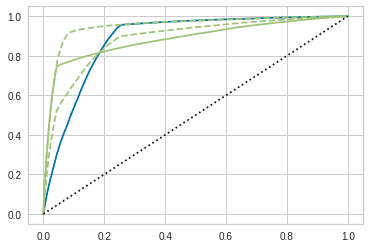

In [ ]:
#ROC Curve
# Before: takes 4.54 min (~ 5 min) to output this code
# After: takes 2.49 min to output code now, however, there is still legend error. What is the x-axis and y-axis?
visualizer = ROCAUC(lr_model, classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
visualizer.legend()

*For some reason the legend doesn't show...*

#**Decision Tree Classifier**

In [ ]:
# Before: takes 1.95 min (~ 2 min) to output this code
# After: takes 1.02 min to output code now 
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 0)
dt_model = clf_dt.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
y_pred = dt_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    230319
         1.0       0.66      0.67      0.67     52663

    accuracy                           0.87    282982
   macro avg       0.79      0.80      0.79    282982
weighted avg       0.88      0.87      0.88    282982



0.874723480645412

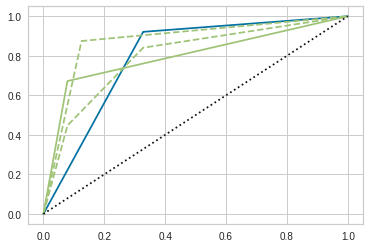

In [ ]:
df_red.columns #ROC Curve
# Before: takes 2.06 min to output this code
# After: takes 1.29 min to output code now 
visualizer = ROCAUC(dt_model, classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) # what is the x and y axis?

#**Random Forest Classifier**

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df_dum.drop(['ARR_DEL15'], axis = 1)
y = df_dum['ARR_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9) # 10% training and 90% test because the model is very slow and doesn't run. It crashes--out of RAM memory

In [ ]:
# After: takes 1.44 min to output code now, does not crash like before 
#Create a Gaussian Classifier 
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Accuracy has improved, before it was 0.86 - Celine

Accuracy: 0.9121517491317656


###Ada Boost Classifier


In [ ]:
# takes 0.72 min (~ 1 min) to output code 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
Adaboost = RandomForestClassifier()
model_adaboost = Adaboost.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
y_pred = model_adaboost.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95    414780
         1.0       0.80      0.71      0.75     94587

    accuracy                           0.91    509367
   macro avg       0.87      0.83      0.85    509367
weighted avg       0.91      0.91      0.91    509367



# Keras Model

Binary Cross Entropy Loss from https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [ ]:
# At this time, the RAM crashed - Celine 
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
X1 = X.values
y1 = y.values.astype(int)

sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size= 0.25)

In [ ]:
X1_train.shape

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim= 718, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(250, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
opt = SGD(lr= 0.01, momentum= 0.9)
model.compile(loss= 'binary_crossentropy', optimizer= opt, metrics= ['accuracy'])

In [ ]:
history = model.fit(X1_train, y1_train, validation_data= (X1_test, y1_test), epochs= 10, batch_size= 64)

In [ ]:
_, train_acc = model.evaluate(X1_train, y1_train, verbose=0)
_, test_acc = model.evaluate(X1_test, y1_test, verbose=0)

In [ ]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [1]:
f, (ax1, ax2) = plt.subplots(2,1,sharex= True)
ax1.set_title('Loss')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.legend()
# plot accuracy during training
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch #')
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='test')
ax2.legend()
plt.show()

NameError: ignored